# Simple Linear Regression and Data sets



<div class="alert alert-block alert-warning">
<b>Simple linear regression is commonly used in forecasting and financial analysis—for a company to tell how a change in the GDP could affect sales, for example. 


In this Module you will become familiar with:

-reading data from a csv or txt file, 

-be able to inspect the type of data in the data file, 

-visualize the data, 

-apply minimum statistic analysis to the data

-perform a linear regression analysis to find the best linear and polynomial fit to the data
    </div>

# First step:

   The Pandas library is built on NumPy and provides easy-to-use data structures and data analysis tools for the Python programming language.

In [1]:
import pandas as pd

We need that to work with Data Structures: Series and DataFrame.
    
    https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html

## MiniTheory: Linear Regression using Least Squares
 (thanks to Adarsh Menon)
 
![animation](animation-gif2.gif)  
## Linear Regression  
In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. In the case of one independent variable it is called simple linear regression. For more than one independent variable, the process is called mulitple linear regression. We will be dealing with simple linear regression in this tutorial.  
Let **X** be the independent variable and **Y** be the dependent variable. We will define a linear relationship between these two variables as follows:  

\\[ Y = mX + c \\]  
![mxplusc](http://www.nabla.hr/SlopeInterceptLineEqu.gif)

This is the equation for a line that you studied in high school. **m** is the slope of the line and **c** is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of **Y** for any given value of **X**.  
  
Our challenge today is to determine the value of **m** and **c**, that gives the minimum error for the given dataset. We will be doing this by using the **Least Squares** method.  

## Finding the Error  
So to minimize the error we need a way to calculate the error in the first place. A **loss function** in machine learning is simply a measure of how different the predicted value is from the actual value.  
Today we will be using the **Quadratic Loss Function** to calculate the loss or error in our model. It can be defined as: 
  
\\[ L(x) = \sum_{i=1}^n (y_i - p_i)^2\\]  
![error](error.jpg)   
  
We are squaring it because, for the points below the regression line **y - p** will be negative and we don't want negative values in our total error.  

## Least Squares method  
Now that we have determined the loss function, the only thing left to do is minimize it. This is done by finding the partial derivative of **L**, equating it to 0 and then finding an expression for **m** and **c**. After we do the math, we are left with these equations:    
  
\\[m = \frac{\sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^n (x_i - \bar x)^2}\\]  
  
\\[c = \bar y - m\bar x\\]  
  
Here $\bar x$ is the mean of all the values in the input **X** and $\bar y$ is the mean of all the values in the desired output **Y**. This is the Least Squares method. 


In simple linear regression, if the coefficient of x (m) is positive, then we can conclude that the relationship between the independent and the dependent variables is positive.
Now, if the coefficient of x is negative, then we can say that the relationship between the independent and the dependent variables is negative.


Now we will implement this in python and make predictions.  


# Step 1. Get familiar with DataFame and row reading in a dictionary before learning about The Dataset used for linear regression 

Pandas DataFrame:  A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.

You won't always be plotting graphs straight up from a Python IDLE by typing in that data. Many times, the data that you want to graph is found in some type of file, such as a CSV file (comma-separated values file). Using the CSV module in Python, you can import a CSV file, read it, and extract the data from it, such as the x-axis data and the y-axis data. You're now ready to import the CSV file into Python using read_csv() from pandas:

More info at:
    
    https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/

In [34]:
# Making imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [35]:
# Preprocessing Input data
data = pd.read_csv('data_Module8.csv')

In [70]:
#View ddata
data

,Bees,Fruits
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


This data frame contains two columns. Have a look at the original datafile with excel and compare python reading and the original data file. 

 * Make yourself a tea now, strech your back.

Headers refer to the column names of your dataset. For some datasets you might encounter, the headers may be completely missing, partially missing, or they might exist, but you may want to rename them. 

In [78]:
data.describe()

,Bees,Fruits
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


# Step 2.View some data

We will use data.iloc to extract some of columns from our data.

.iloc[] is primarily integer position based (from 0 to length-1 of the axis)

Let's view the first 3 data points of the first column:

In [79]:
type(data.iloc[[0]])

pandas.core.frame.DataFrame

In [80]:
#extract = data.iloc[first row : third row , first column]
extract = data.iloc[0:3, 0]
#show data
print(extract)

0    32.502345
1    53.426804
2    61.530358
Name: Bees, dtype: float64


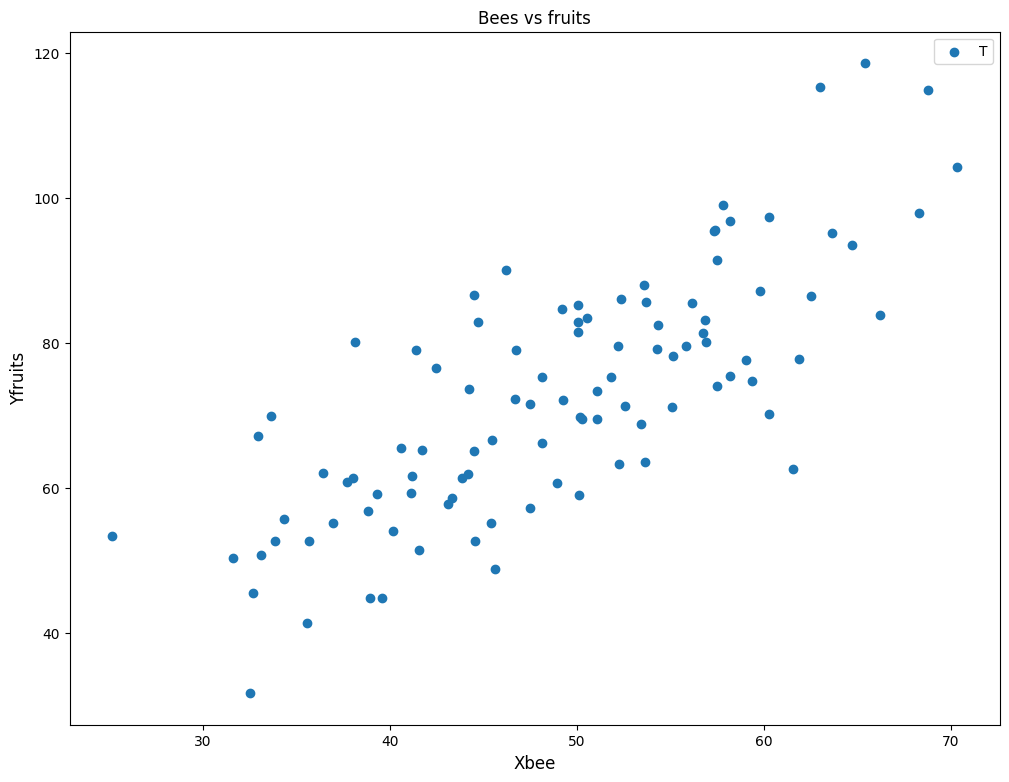

In [181]:
# Visualize the change in the variables and Validate linear relationship by plotting 
# a simple scatter plot

X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)

plt.xlabel("Xbee", fontsize = 12)
plt.ylabel("Yfruits", fontsize = 12)
plt.title("Bees vs fruits")
plt.legend("Text")
plt.show()

## Exercise: 

Before working on the linear regression of the two variables x and y, let's plot the first and the second column, i.e. x and y , to have an idea about the type of data and the behaviour of time series.

<Axes: >

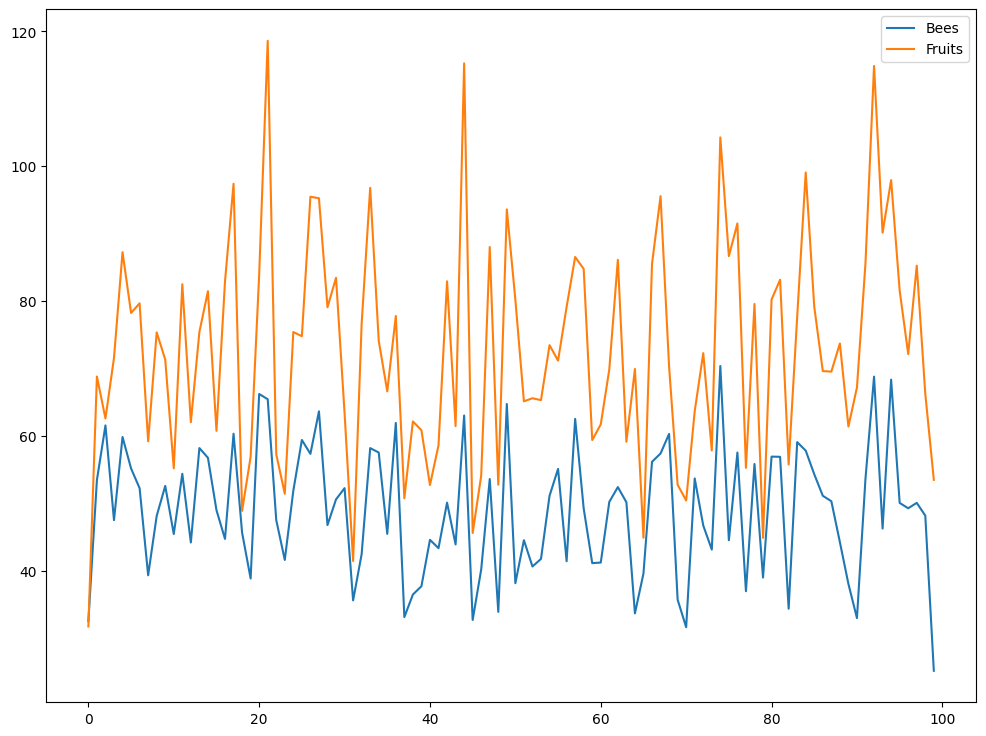

In [182]:
data.plot()

Too big! Try a smaller customized graph:

<Axes: >

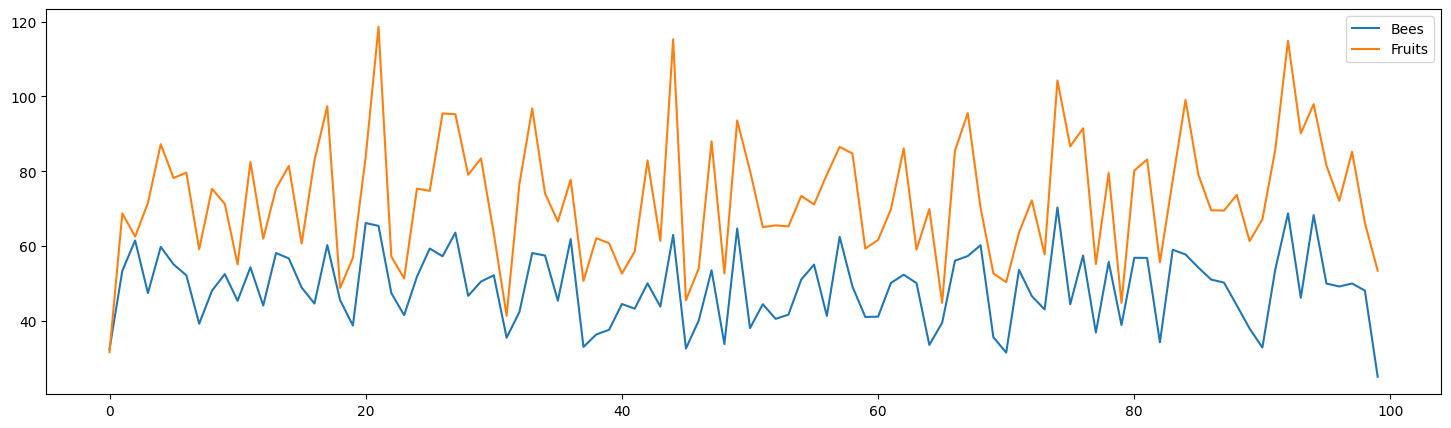

In [41]:
data.plot(figsize=(18,5))

Upon closer inspection, you should notice two odd things about the plot

    *There seems to be no missing data 

    *There appear to be some spikes  in the data (upwards spikes)


How do we know if No missing data:  The “False” output confirms that there are no null values in the dataframe:

In [42]:
data.isnull().values.any()

False

What kind of data figures do we work with?

In [43]:
print(data[:].dtypes)

Bees      float64
Fruits    float64
dtype: object


 We just saw that columns represent  float column.

# Step 3. Histograms of data

Next step: .hist() creates one histogram per column, thereby giving a graphical representation of the distribution of the data. The graphs show that the data roughly follows a normal distribution.

This example draws a histogram based on the length and width of some animals, displayed in three bins

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

## Note:
    
See also

matplotlib.pyplot.hist (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist)

You can plot a histogram using matplotlib.

array([[<Axes: title={'center': 'Bees'}>,
        <Axes: title={'center': 'Fruits'}>]], dtype=object)

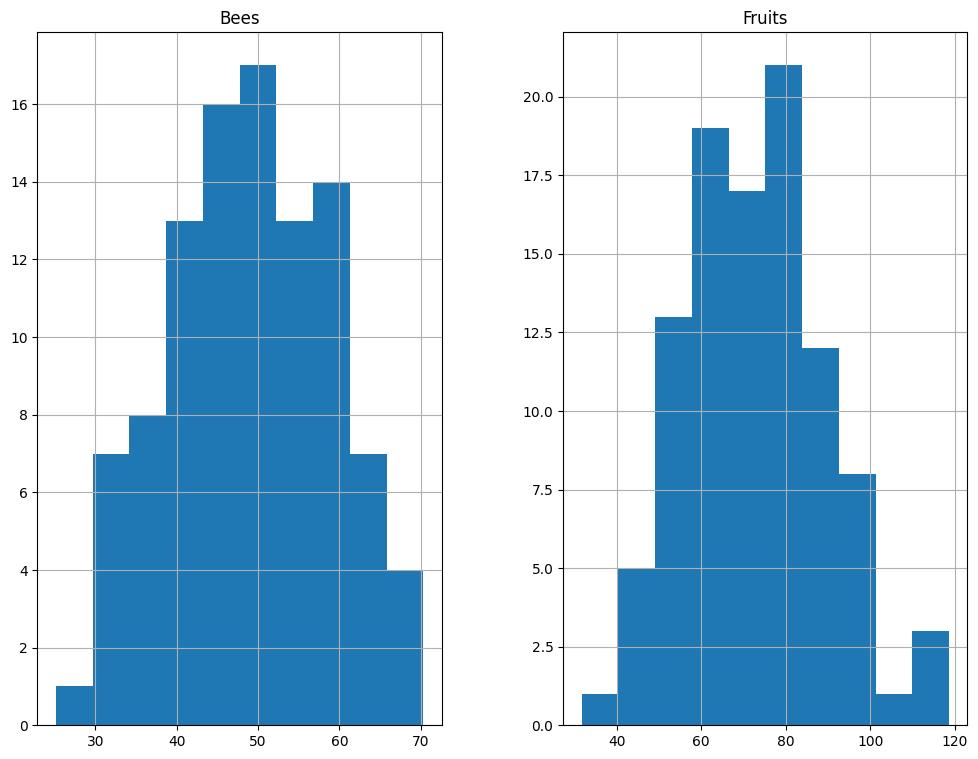

In [44]:
data.hist()

Finally!! Let's do regressions:

# Step 4: Let's build the linear regression model from scratch (by hand)

Let's keep the same data from the file: data_Module8.csv and calculate the parameters for the best fit line: y= m x + c

In [183]:
# Building the model
#Calculate the mean of columns

X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den # see the mathematical relation above
c = Y_mean - m*X_mean

print (m, c)

1.3224310226878686 7.991020985734423


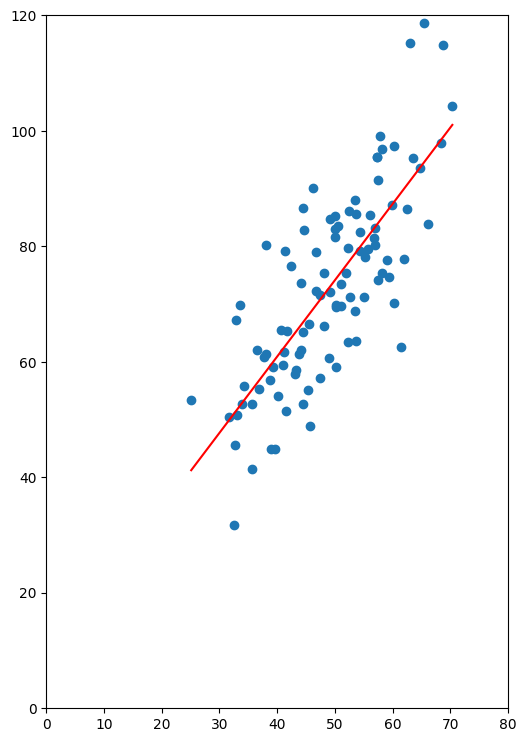

In [197]:
# Making predictions: 
Y_pred = m*X + c


ax.set_aspect('equal')
plt.axes().set_aspect('equal')
plt.scatter(X, Y) # actual

plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.xlim([0, 80])
plt.ylim([0, 120])
plt.show()

## Interpretation:

From the graph above, we can clearly see that there is a positive linear relation between the two column data.

# Step 5: Let's build the linear regression model with the Scikit-Learn Model

Now, we will learn how to use Scikit library,to do the same thing:

In [184]:
# and the 6 lines of coding:

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#With Scikit-Learn it is extremely straight forward to implement linear regression models, as all you really need to do is import the LinearRegression class, instantiate it, and call the fit() method along with our training data.
#This is about as simple as it gets when using a machine learning library to train on your data.

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[32.50234527 53.42680403 61.53035803 47.47563963 59.81320787 55.14218841
 52.21179669 39.29956669 48.10504169 52.55001444 45.41973014 54.35163488
 44.1640495  58.16847072 56.72720806 48.95588857 44.68719623 60.29732685
 45.61864377 38.81681754 66.18981661 65.41605175 47.48120861 41.57564262
 51.84518691 59.37082201 57.31000344 63.61556125 46.73761941 50.55676015
 52.22399609 35.56783005 42.43647694 58.16454011 57.50444762 45.44053073
 61.89622268 33.09383174 36.43600951 37.67565486 44.55560838 43.31828263
 50.07314563 43.87061265 62.99748075 32.66904376 40.16689901 53.57507753
 33.86421497 64.70713867 38.11982403 44.50253806 40.59953838 41.72067636
 51.08863468 55.0780959  41.37772653 62.49469743 49.20388754 41.10268519
 41.18201611 50.18638949 52.37844622 50.13548549 33.64470601 39.55790122
 56.13038882 57.36205213 60.26921439 35.67809389 31.588117   53.66093226
 46.68222865 43.10782022 70.34607562 44.49285588 57.5045333  36.93007661
 55.80573336 38.95476907 56.9012147  56.86890066 34.3331247  59.04974121
 57.78822399 54.28232871 51.0887199  50.28283635 44.21174175 38.00548801
 32.94047994 53.69163957 68.76573427 46.2309665  68.31936082 50.03017434
 49.23976534 50.03957594 48.14985889 25.12848465].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Big error! Why?

We have to do: Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


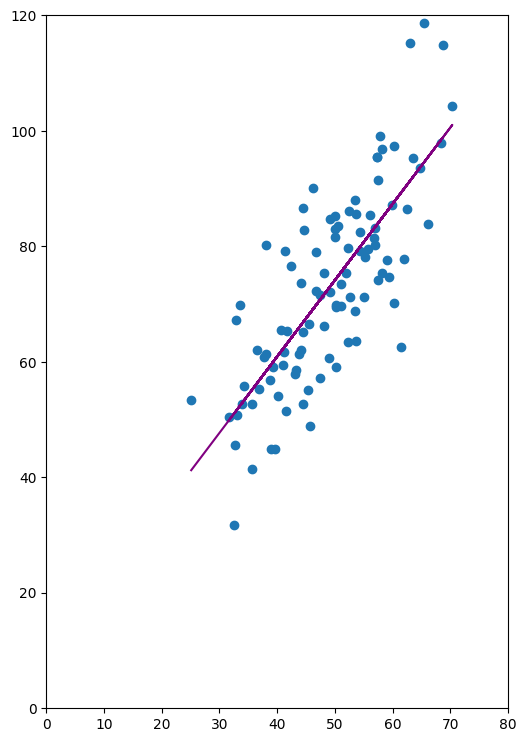

In [195]:

#Data must be reshaped to become a numpy array!!!!! for model.fit
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)


# and the 6 lines of coding:

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#With Scikit-Learn it is extremely straight forward to implement linear regression models, as all you really need to do is import the LinearRegression class, instantiate it, and call the fit() method along with our training data.
#This is about as simple as it gets when using a machine learning library to train on your data.

ax.set_aspect('equal')
plt.axes().set_aspect('equal')
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='purple')
plt.xlim([0, 80])
plt.ylim([0, 120])
plt.show()

To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

To retrieve the y- intercept:

In [190]:
#y-intercept
print("y-intercept=",linear_regressor.intercept_)
#slope:
print("slope=",linear_regressor.coef_)

print(mean_squared_error(Y,Y_pred))

y-intercept= [7.99102099]
slope= [[1.32243102]]
110.25738344912885


Using each of these values, we can write the fitted regression model equation:

y= m x + c

y= 1.32243102 x + 7.99


As before !!!!!!


# Let's learn about a  simpler linear regression model using a new library: scikit

In [109]:
!pip install sklearn

<div class="alert alert-block alert-warning">
<b>The moment you’ve all been waiting for! Scikit-Learn makes it extremely easy to run models & assess its performance.  


Let's apply the regression functions from the SciKit module to a new set of data generated inside the code below.

x is a variable from 0 to 50,

y =  a*x + b is just some linear data with a little bit of random noise added 

The noise is generated using the random module  of numpy (np.random.normal(size=x.shape)

</div} 

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In this example, a linear regression model is created based on data in a numpy array. 



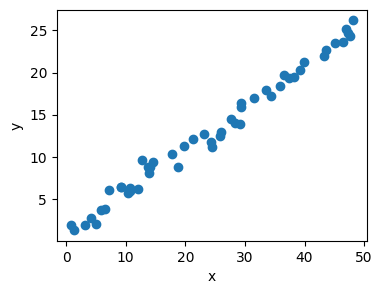

In [164]:
# x from 0 to 50
NN=50
x = NN * np.random.random((NN, 1))

# y = a*x + b with noise
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)




# plot the results
plt.figure(figsize=(4, 3))

ax = plt.axes()
ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()

Call the linear regression model and apply it to all data less the last 15.


Some people call it : 

from sklearn.linear_model import LinearRegression


OR

from sklearn import linear_model
reg = linear_model.LinearRegression()

In [165]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

#THRESHOLD
THR=-15
# Choose the data allocated to training and find a model
# Create a linear regression object reg
reg.fit(x[:THR],y[:THR])

LinearRegression()

Once you have your model fitted, you can get the results to check whether the model works satisfactorily and to interpret it.

A well-fitting regression model results in predicted values close to the observed data values. 

Three statistics are used in Ordinary Least Squares (OLS) regression to evaluate model fit: R-squared, the overall F-test, and the Root Mean Square Error (RMSE). 



R-squared has the useful property that its scale is intuitive: it ranges from zero to one, with zero indicating that the proposed model does not improve prediction over the mean model, and one indicating perfect prediction. Improvement in the regression model results in proportional increases in R-squared.

In this code we will use: the  coefficients of linear regression are formulated and then printed in the console: reg.coef_

- It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model. Ot it ssesses how strong the linear relationship is between two variables. ($r^2$)

- 1.0 demonstrates a high correlation and 0.0 shows no correlation

 The mean squared error measures the average of the squares of the errors. $(y_{pred} - y_{true})^2$
 
 
You can obtain the coefficient of determination, 𝑅², with .score() called on model.

A good example: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

More reading: https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/

Coefficients: 
 [[0.48734299]]
Mean squared error: 0.89
Coefficient of determination: 0.99


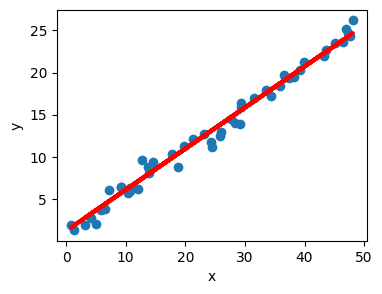

In [166]:
# Choose the data allocated to testing
x_new=x[THR:]
# Make predictions using the testing set
y_new=reg.predict(x[THR:])

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y[THR:], y_new))
#Mean Squared Error (MSE) - The ‘standard’ that punishes outliers 
#for good—and bad sometimes!


# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y[THR:], y_new))


# plot the results
plt.figure(figsize=(4, 3))

ax = plt.axes()
ax.scatter(x, y)

ax.plot(x_new, y_new, color="red", linewidth=3)


ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()

Basic maths: We can calculate the mean squared error ourselves using the below formula:

In [168]:
def mae(y_actual,y_pred):
    r = np.mean([ (ya-yp)**2 for ya,yp in zip(y_actual,y_pred)  ])
    #r = np.mean(abs(y_actual-y_pred)**2) # Pandas-idiomatic way
    return r 
mae(y[THR:], y_new) # baseline 

0.8905480317904401

In [156]:


# The following section will get results by interpreting the created instance: 

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(x_new, y_new)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 



coefficient of determination: 0.9995755600694914
intercept: [0.89058854]
slope: [[0.4983839]]


## Note:
    
    With Scikit-Learn it is extremely straight forward to implement linear regression models.
   


#------------------------------------------------

## Exercise: Let's apply the scikit model for Sand on Beaches



You need only 6 lines to make a linear regression fitting.
   

Diameter of Sand Granules Vs. Slope on Beach

In the following data pairs

X = median diameter (mm) of granules of sand

Y = gradient of beach slope in degrees

The data is for naturally occurring ocean beaches
Reference: Physical geography by A.M King, Oxford Press, England

X	Y
2.900000095	4
6.699999809	7.400000095
4.900000095	5
7.900000095	7.199999809
9.800000191	7.900000095
6.900000095	6.099999905
6.099999905	6
6.199999809	5.800000191
6	5.199999809
5.099999905	4.199999809
4.699999809	4
4.400000095	4.400000095
5.800000191	5.199999809

Write the data as new arrays and apply the scikit model to fit the data with a linear regression model.

Or, you can read the excel data and then create your own X and Y arrays, then proceed.


In [ ]:
# Preprocessing Input data

from pandas import read_excel
# find your sheet name at the bottom left of your excel file and assign 
# it to my_sheet 

file_name = 'sand.xlsx' # change it to the name of your excel file
df = read_excel(file_name)
print(df.head()) # shows headers with top 5 rows





## Note:

Do remember that in statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.

Linear regression is perhaps one of the most well known and well understood algorithms in statistics and machine learning.

You do not need to know any statistics or linear algebra to understand linear regression. This is a gentle high-level introduction to the technique to give you enough background to be able to use it effectively on your own problems.

# Polynomial fitting

<div class="alert alert-block alert-warning">
<b>Sometimes a  straight line is unable to capture the patterns in the data. This can be an example of under-fitting. To overcome under-fitting, we need to increase the complexity of the model.
    
   To generate a higher order equation we can add powers of the original features as new features. The linear model,

y=a x +b

can be transformed to

y= a+ b x + c x^2


Let's try a fitting of some data with a polynomial of second, third,... order.
    
</div>





We will use :

- First: PolynomialFeatures class provided by Numpy Polyfit and 
- Second: Scikit-learn using Linear Regression.


https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

This example shows how to fit a polynomial curve to a set of data points using the poly function. You can use fit to find the coefficients of a polynomial that fits a set of data in a least-squares 

[-0.8675031   1.91386413 -0.02880524]
         2
-0.8675 x + 1.914 x - 0.02881


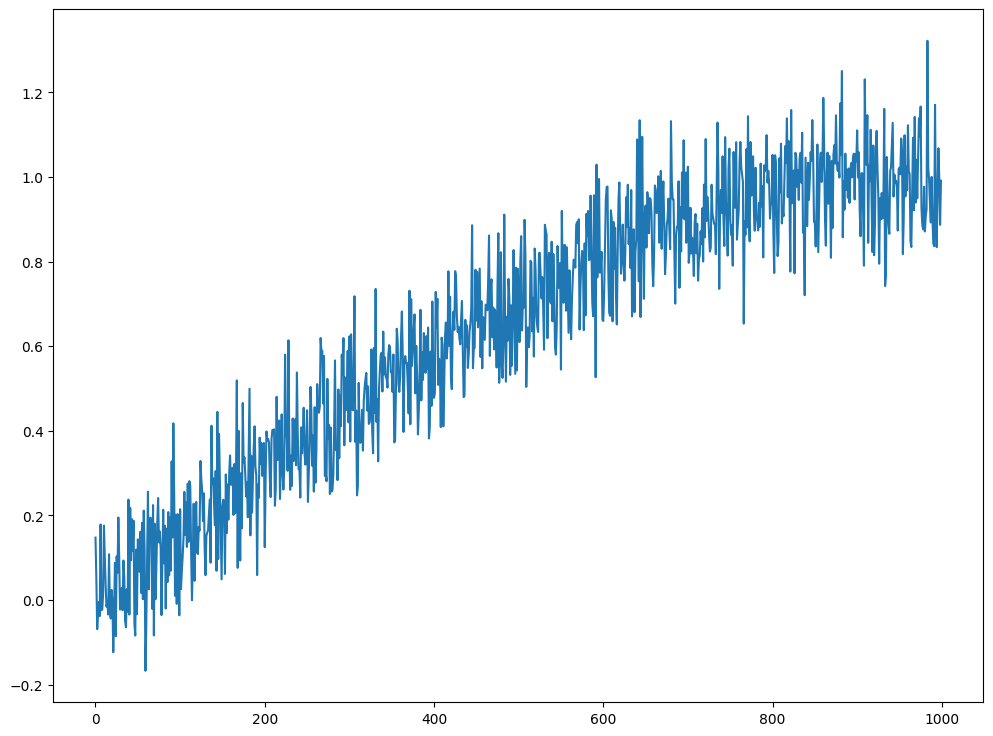

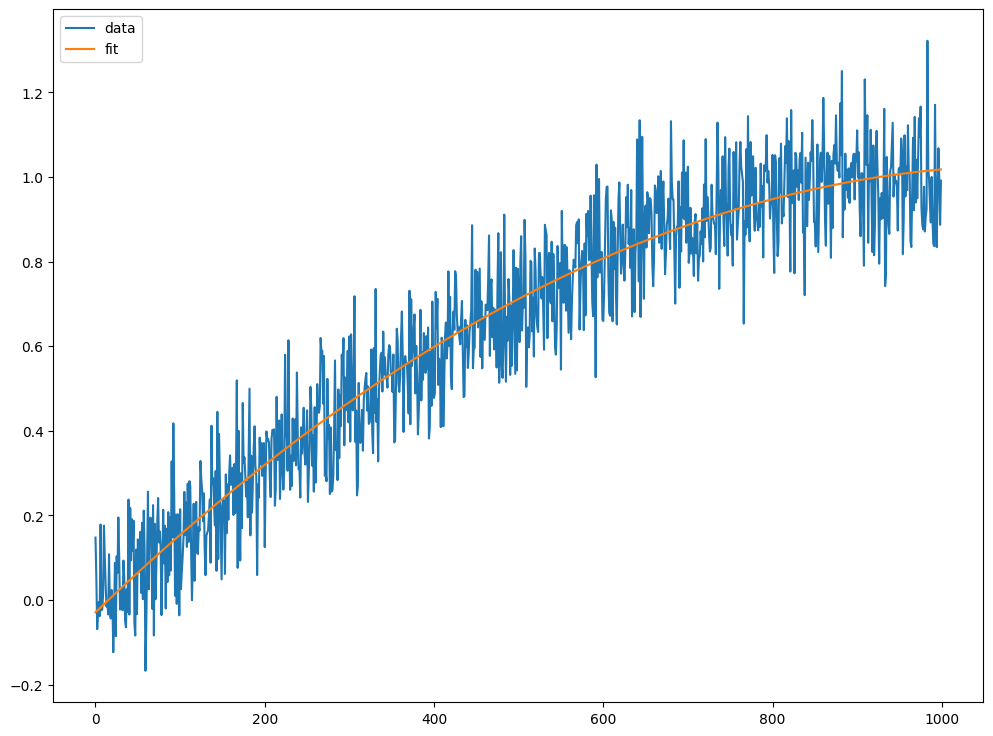

In [210]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,1000)
f = 1/4

sine = np.sin(2*np.pi*f*x) + np.random.normal(scale=0.1, size=len(x))
plt.plot(sine)

#The actual fitting happens here, with the degree of polynomial deg
poly = np.polyfit(x, sine, deg=2)
## print the coefficients
print(poly)

fig, ax = plt.subplots()
ax.plot(sine, label='data')
ax.plot(np.polyval(poly, x), label='fit')
ax.legend()


#For deg =2 Output is

#coefficient of x^2= first
#coefficient of x= second
#constant= third 


polynomial=np.poly1d(poly)
print(polynomial)



In [212]:
# import the numpy package
import numpy as np
# define the varialbles
x=[1,2,3,4,5,6,7,8]
y=[2.1,44.2,56,12.43,54,33.21,98,7.6]
# find the coefficients of the polynomial with degree 2
coefficient=np.polyfit(x,y,deg=2)
# print the coefficients
print(coefficient)

[ -2.31952381  24.21738095 -11.38785714]


Now, use Skleant to do a similar work:

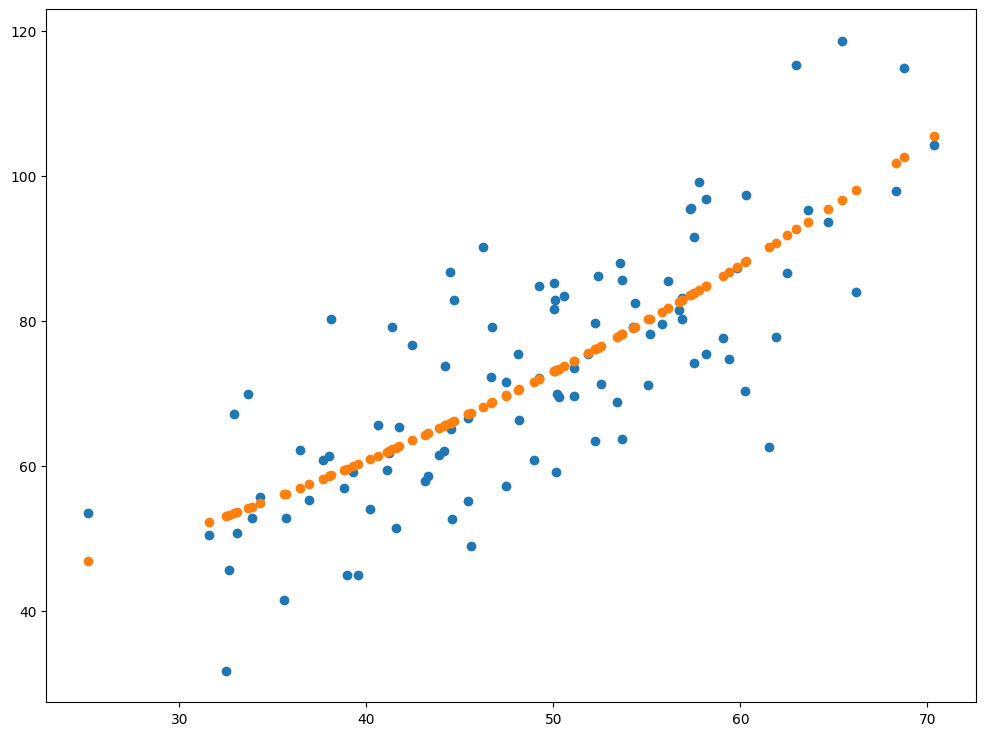

In [214]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2)
#print(X)
X_poly = pr.fit_transform(X)
pr.fit(X_poly, Y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
#plot original data points
plt.scatter(X, Y)
#plot the model
plt.scatter(X, lin_reg.predict(pr.fit_transform(X)))
plt.show()

#the above two line commands have  very condensed form
#if you want an expanded form for this part of the code: you can use instead

#y_poly_pred=lin_reg.predict(pr.fit_transform(X))
#plt.scatter(X,y_poly_pred)
#plt.show()
